In [2]:
import pandas as pd
import numpy as np

from pathlib import Path
from fastai.conv_learner import *

PATH = Path('/data/airbus/')
list(PATH.iterdir())

[PosixPath('/data/airbus/sample_submission.csv'),
 PosixPath('/data/airbus/tmp'),
 PosixPath('/data/airbus/train_ship_segmentations.csv'),
 PosixPath('/data/airbus/train'),
 PosixPath('/data/airbus/models'),
 PosixPath('/data/airbus/test'),
 PosixPath('/data/airbus/train-128'),
 PosixPath('/data/airbus/train_masks'),
 PosixPath('/data/airbus/train_masks-128')]

In [3]:
segments = pd.read_csv(PATH/'train_ship_segmentations.csv')
segments.head()

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
2,00021ddc3.jpg,101361 1 102128 3 102896 4 103663 6 104430 9 1...
3,00021ddc3.jpg,95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...
4,00021ddc3.jpg,74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...


In [4]:
counts = segments.groupby('ImageId')['EncodedPixels'].count().sort_values(ascending = False)
counts.head()

ImageId
dbfd1d7cc.jpg    15
4ea5a8a2f.jpg    15
405b98f45.jpg    15
73361816c.jpg    15
731d25545.jpg    15
Name: EncodedPixels, dtype: int64

## Ships by Image

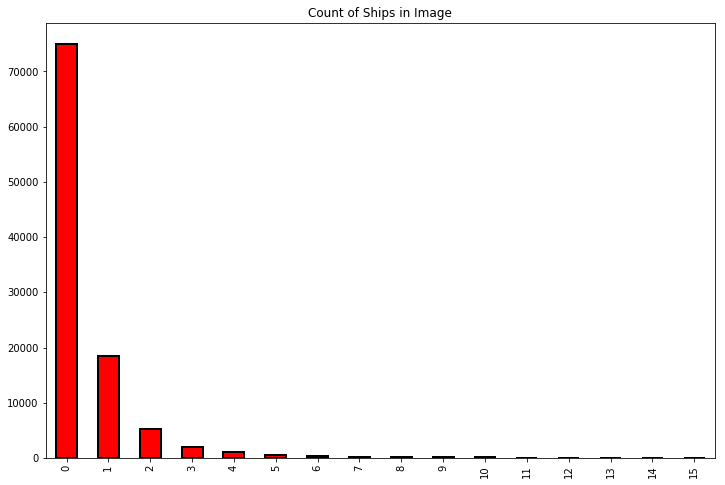

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12, 8))
counts.value_counts().plot.bar(color = 'r', edgecolor = 'k', linewidth = 2);
plt.title('Count of Ships in Image');

## Example of Encoded Mask

In [6]:
encoded = np.array(segments.loc[1, 'EncodedPixels'].split(), int)
encoded[:10]

array([264661,     17, 265429,     33, 266197,     33, 266965,     33, 267733,     33])

In [43]:
np.sum(encoded[1::2])

3388

# Count Pixels Per Mask

In [7]:
def count_pixels(x):
    if pd.isna(x):
        return x
    else:
        return np.sum(np.array(x.split(), int)[1::2])
    
totals = segments['EncodedPixels'].apply(count_pixels)
segments['total_pixels'] = list(totals)
segments.describe()

,total_pixels
count,56030.000000
mean,1565.500553
std,2851.370259
min,2.000000
25%,111.000000
50%,403.000000
75%,1541.000000
max,25904.000000


In [8]:
segments[segments['total_pixels'] == 2]

,ImageId,EncodedPixels,total_pixels
1311,02776139a.jpg,33570 2,2.0
35856,461f9e3e6.jpg,199006 1 200541 1,2.0
44212,5676dac91.jpg,199518 1 201053 1,2.0
49557,60ca4f877.jpg,230178 2,2.0
57031,6f4bac38d.jpg,396126 1 397661 1,2.0
62183,79123fc78.jpg,426530 2,2.0
65236,7efdb69ff.jpg,395614 1 397149 1,2.0
79081,9a39363b0.jpg,229922 2,2.0
91289,b22e2f206.jpg,199262 1 200797 1,2.0
113084,dd38da47f.jpg,33314 2,2.0


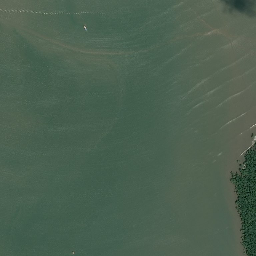

In [9]:
Image.open(PATH/'train/461f9e3e6.jpg').resize((256, 256))

In [10]:
segments.loc[segments['total_pixels'] > 25000]

,ImageId,EncodedPixels,total_pixels
64287,7d35cf46b.jpg,180785 3 181547 9 182309 15 183071 21 183833 2...,25245.0
82598,a129c36b3.jpg,135723 4 136484 11 137244 19 138005 26 138766 ...,25904.0
107888,d30187b5a.jpg,181041 3 181803 9 182565 15 183327 21 184089 2...,25245.0
120555,eba27cc8a.jpg,135467 4 136228 11 136988 19 137749 26 138510 ...,25904.0


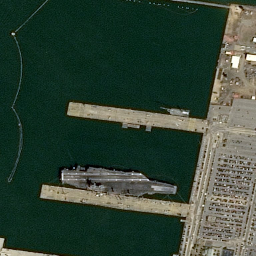

In [11]:
Image.open(PATH/'train/a129c36b3.jpg').resize((256, 256))

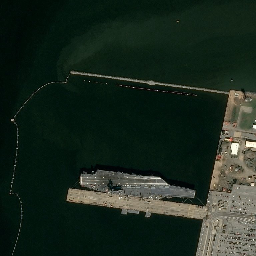

In [12]:
Image.open(PATH/'train/d30187b5a.jpg').resize((256, 256))

## Images with Ships, Total Pixels, and Pixels per Ship

In [13]:
images = pd.DataFrame(counts).rename(columns = {'EncodedPixels': 'ships'})
images['total'] = segments.groupby('ImageId')['total_pixels'].sum()
images['pixels_per_ship'] = images['total'] / images['ships']
images.head()

,ships,total,pixels_per_ship
ImageId,,,
dbfd1d7cc.jpg,15,1610.0,107.333333
4ea5a8a2f.jpg,15,988.0,65.866667
405b98f45.jpg,15,898.0,59.866667
73361816c.jpg,15,1099.0,73.266667
731d25545.jpg,15,988.0,65.866667


In [14]:
images[images['total'] > 50000]

,ships,total,pixels_per_ship
ImageId,,,
0334e61a7.jpg,12,50745.0,4228.750000
ccfb18b6c.jpg,8,76720.0,9590.000000
eeafd580e.jpg,7,56813.0,8116.142857
a182903f8.jpg,7,56813.0,8116.142857


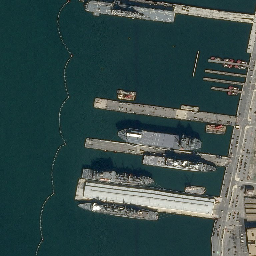

In [15]:
Image.open(PATH/'train/0334e61a7.jpg').resize((256, 256))

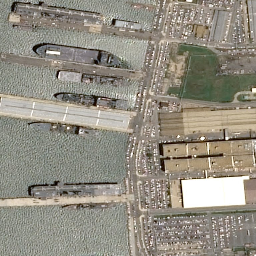

In [16]:
Image.open(PATH/'train/eeafd580e.jpg').resize((256, 256))

In [17]:
images['ships'] = images['ships'].fillna(0)

(array([75000., 18525.,  5232.,  2032.,  1079.,   609.,   453.,   273.,   223.,   173.,   121.,    99.,
           93.,    59.,    99.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.]),
 <a list of 15 Patch objects>)

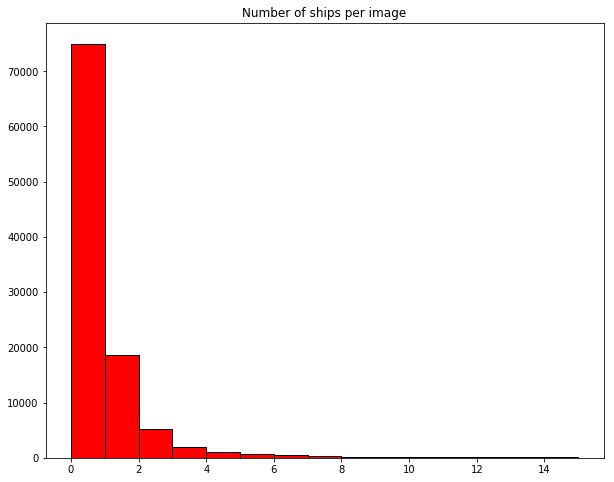

In [18]:
plt.figure(figsize = (10, 8))
plt.title('Number of ships per image');
plt.hist(images['ships'], color = 'r', edgecolor = 'k', bins = 15)

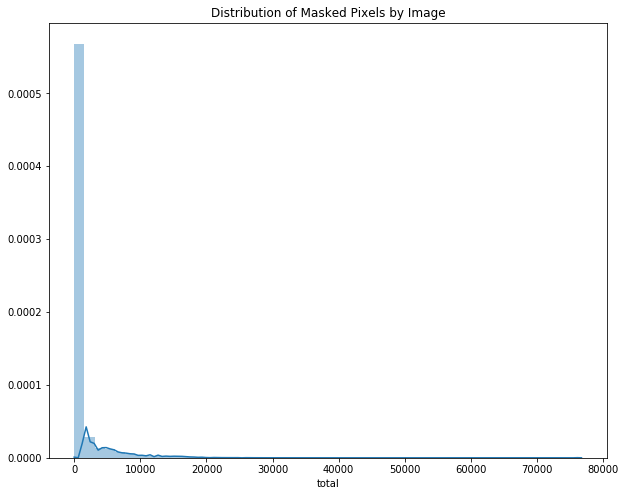

In [20]:
plt.figure(figsize = (10, 8))
sns.distplot(images['total']);
plt.title("Distribution of Masked Pixels by Image");

# File Size

Files less than 50 kb in size are corrupted.

In [88]:
import os

images['file_size_kb'] = images.index.map(lambda x: os.stat(PATH/f'train/{x}').st_size / 1024)

In [89]:
images['file_size_kb'].describe()

count    104070.000000
mean        147.049617
std          55.062072
min           9.612305
25%         108.062500
50%         129.948242
75%         177.534180
max         494.252930
Name: file_size_kb, dtype: float64

In [108]:
images[(images['file_size_kb'] < 50) & (images['ships'] > 0)].sort_values('file_size_kb').tail()

,ships,total,pixels_per_ship,file_size_kb
ImageId,,,,
bfece7709.jpg,1,254.0,254.000000,49.899414
7cbfa4c30.jpg,2,1445.0,722.500000,49.934570
2355209cd.jpg,5,336.0,67.200000,49.934570
36da11b6e.jpg,1,11566.0,11566.000000,49.941406
ca803786e.jpg,3,1748.0,582.666667,49.989258


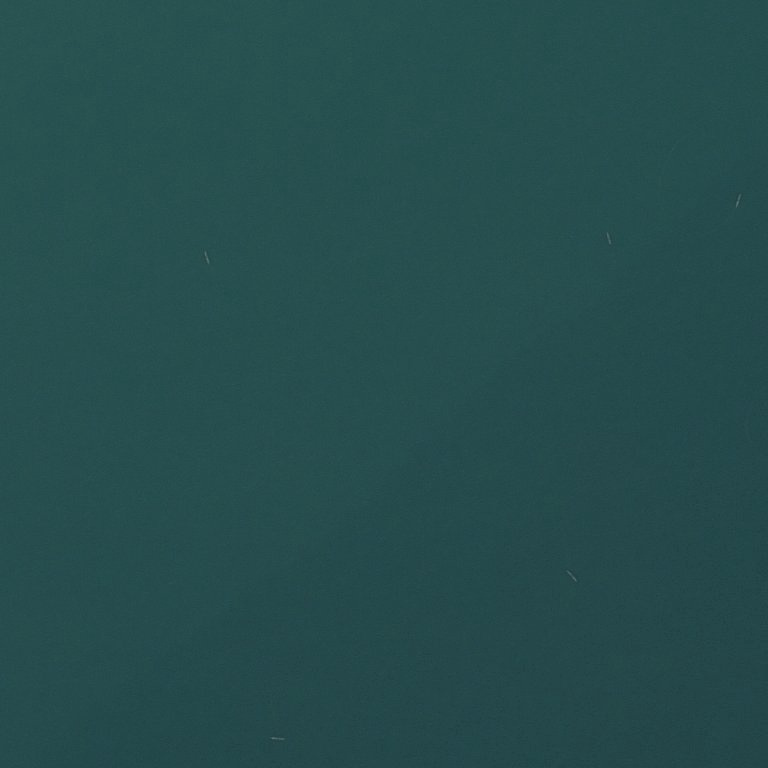

In [109]:
Image.open(PATH/'train/2355209cd.jpg')

In [110]:
images = images[(images['file_size_kb'] > 50) | (images['ships'] > 0)]

# Stratify Based on Number of Ships

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, ships_train, ships_test = train_test_split(images, images['ships'], stratify = images['ships'],
                                                            test_size = 30000)

In [114]:
len(X_train), len(X_test)

(73695, 30000)

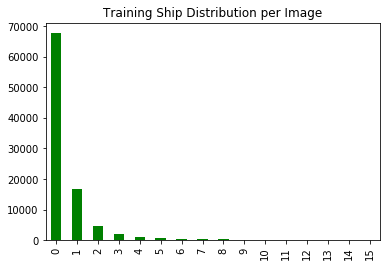

In [24]:
ships_train.value_counts().plot.bar(color = 'g');
plt.title('Training Ship Distribution per Image');

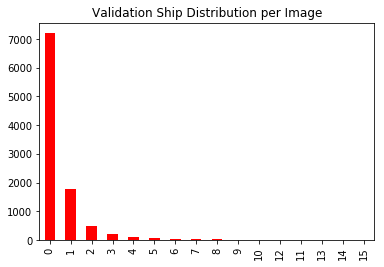

In [26]:
ships_test.value_counts().plot.bar(color = 'r');
plt.title('Validation Ship Distribution per Image');

## Masked Pixels in Each Set

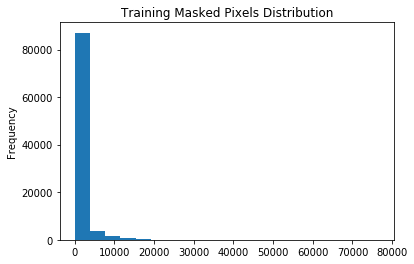

In [27]:
X_train['total'].plot.hist(bins = 20);
plt.title('Training Masked Pixels Distribution');

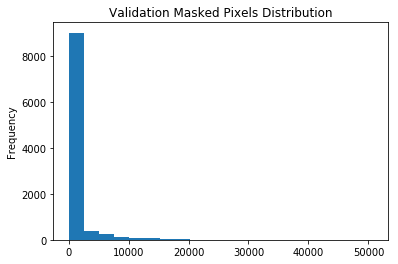

In [28]:
X_test['total'].plot.hist(bins = 20);
plt.title('Validation Masked Pixels Distribution');

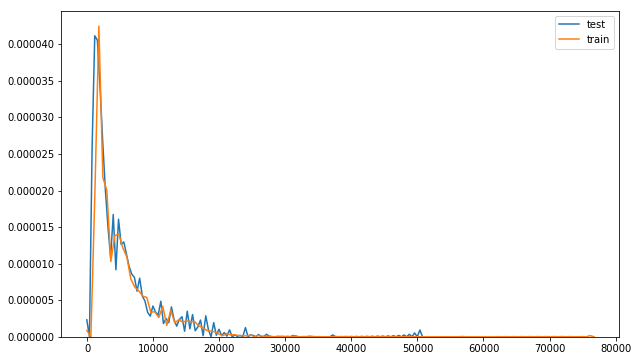

In [29]:
plt.figure(figsize = (10, 6))
sns.kdeplot(X_test['total'], label = 'test')
sns.kdeplot(X_train['total'], label = 'train')
plt.legend();

In [30]:
images.sort_values('pixels_per_ship', ascending = False).head()

,ships,total,pixels_per_ship
ImageId,,,
eba27cc8a.jpg,1,25904.0,25904.0
a129c36b3.jpg,1,25904.0,25904.0
d30187b5a.jpg,1,25245.0,25245.0
e33e51b8e.jpg,1,24216.0,24216.0
0dd92e511.jpg,1,24216.0,24216.0


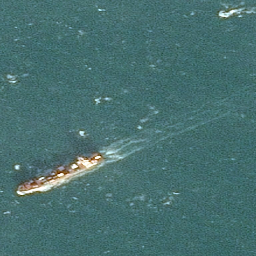

In [31]:
Image.open(PATH/'train/e33e51b8e.jpg').resize((256, 256))

In [32]:
images['ships'].nunique()

16

# Run Length Encoding to Mask

In [54]:
def rle_decode(encoded, height = 768, width = 768):
    encoded = np.array(encoded.split(), dtype = int)
    m_f = np.zeros(height * width, dtype = np.uint8)
    pixels = encoded[::2] - 1
    num = encoded[1::2]

    # Iterate through the pixels
    for start, n_p in zip(pixels, num):
        m_f[start: start + n_p] = 255

    return m_f.reshape((height, width), order = 'F')

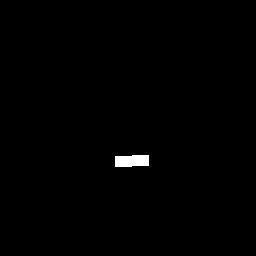

In [55]:
encoded = segments.loc[1, 'EncodedPixels']
mask = rle_decode(encoded)
Image.fromarray(mask).resize((256, 256))

In [56]:
segments.sort_values('total_pixels').dropna().tail()

,ImageId,EncodedPixels,total_pixels
86455,a8ed60086.jpg,332331 4 333092 11 333852 19 334613 26 335374 ...,24599.0
64287,7d35cf46b.jpg,180785 3 181547 9 182309 15 183071 21 183833 2...,25245.0
107888,d30187b5a.jpg,181041 3 181803 9 182565 15 183327 21 184089 2...,25245.0
82598,a129c36b3.jpg,135723 4 136484 11 137244 19 138005 26 138766 ...,25904.0
120555,eba27cc8a.jpg,135467 4 136228 11 136988 19 137749 26 138510 ...,25904.0


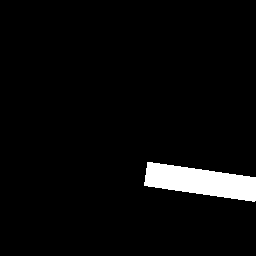

In [57]:
encoded = segments.loc[86455, 'EncodedPixels']
mask = rle_decode(encoded)
Image.fromarray(mask).resize((256, 256))

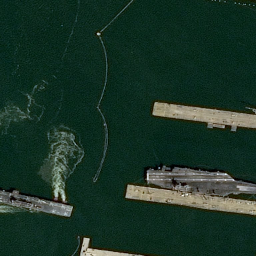

In [58]:
Image.open(PATH/'train/a8ed60086.jpg').resize((256, 256))

# Mask to Run Length Encoding

In [59]:
def rle_encode(mask):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = mask.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    
    return ' '.join(str(x) for x in runs)

In [60]:
encoded = segments.loc[1, 'EncodedPixels']
mask = rle_decode(encoded)
rle_encode(mask)

'264661 17 265429 33 266197 33 266965 33 267733 33 268501 33 269269 33 270037 33 270805 33 271573 33 272341 33 273109 33 273877 33 274645 33 275413 33 276181 33 276949 33 277716 34 278484 34 279252 33 280020 33 280788 33 281556 33 282324 33 283092 33 283860 33 284628 33 285396 33 286164 33 286932 33 287700 33 288468 33 289236 33 290004 33 290772 33 291540 33 292308 33 293076 33 293844 33 294612 33 295380 33 296148 33 296916 33 297684 33 298452 33 299220 33 299988 33 300756 33 301524 33 302292 33 303060 33 303827 34 304595 34 305363 33 306131 33 306899 33 307667 33 308435 33 309203 33 309971 33 310739 33 311507 33 312275 33 313043 33 313811 33 314579 33 315347 33 316115 33 316883 33 317651 33 318419 33 319187 33 319955 33 320723 33 321491 33 322259 33 323027 33 323795 33 324563 33 325331 33 326099 33 326867 33 327635 33 328403 33 329171 33 329938 34 330706 34 331474 33 332242 33 333010 33 333778 33 334546 33 335314 33 336082 33 336850 33 337618 33 338386 33 339154 33 339922 33 340690 33

In [62]:
np.all(np.array(encoded.split(), dtype = int) == np.array(rle_encode(mask).split(), dtype = int))

True

In [64]:
encoded = segments.loc[86455, 'EncodedPixels']
mask = rle_decode(encoded)
rle_encode(mask)
np.all(np.array(encoded.split(), dtype = int) == np.array(rle_encode(mask).split(), dtype = int))

True

# All Masks for One Image

In [82]:
def get_all_masks(image_id):
    # Find all masks for a single ship as an array
    encoded_list = list(segments.loc[segments['ImageId'] == image_id, 
                                  'EncodedPixels'])
    masks = np.zeros((768, 768), dtype = np.uint8)
    
    for encoding in encoded_list:
        masks += rle_decode(encoding)
    
    
    return masks

In [78]:
images.head()

,ships,total,pixels_per_ship
ImageId,,,
dbfd1d7cc.jpg,15,1610.0,107.333333
4ea5a8a2f.jpg,15,988.0,65.866667
405b98f45.jpg,15,898.0,59.866667
73361816c.jpg,15,1099.0,73.266667
731d25545.jpg,15,988.0,65.866667


In [81]:
all_masks

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

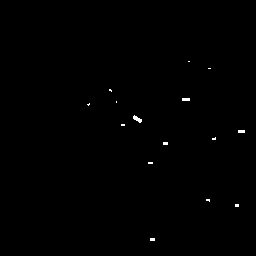

In [84]:
all_masks = get_all_masks('dbfd1d7cc.jpg')
Image.fromarray(all_masks).resize((256, 256))

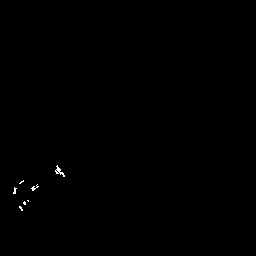

In [85]:
all_masks = get_all_masks('731d25545.jpg')
Image.fromarray(all_masks).resize((256, 256))